# Linear Regression

- This is a supplement material for my lectures on ML. It sheds light on Python implementations of the supervised machine learning algorithms. 
- I assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my code. 
- This material is represented as a Jupyter notebook, which you can easily download to reproduce the code and play around with it. 

## 1. Libraries

To build a model, we need 
- `pandas` library to work with panel dataframes
- `sklearn.model_selection.train_test_split` to split the dataset into train and test
- `sklearn.linear_model.LinearRegression` to build a model

We will also need `matplotlib.pyplot` to visualize a trained model.

In [52]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 2. Data Load & Overview

Let's load the dataset and understand it.

In [3]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/5x12/ml-cookbook/master/supplements/data/cars.csv')

In [4]:
# Print the first 10 rows of the dataset
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


This Cars Dataset represents cars characteristics, along with their prices.

- `car_ID`: Unique id of each observation (Interger)
- `symboling`: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		
- `carCompany`: Name of car company (Categorical)		
- `fueltype`: Car fuel type i.e gas or diesel (Categorical)		
- `aspiration`: Aspiration used in a car (Categorical)		
- `doornumber`: Number of doors in a car (Categorical)		
- `carbody`: body of car (Categorical)		
- `drivewheel`: type of drive wheel (Categorical)		
- `enginelocation`: Location of car engine (Categorical)		
- `wheelbase`: Weelbase of car (Numeric)		
- `carlength`: Length of car (Numeric)		
- `carwidth`: Width of car (Numeric)		
- `carheight` Height of car (Numeric)		
- `curbweight` The weight of a car without occupants or baggage. (Numeric)		
- `enginetype`: Type of engine. (Categorical)		
- `cylindernumber`: Cylinder placed in the car (Categorical)		
- `enginesize`: Size of car (Numeric)		
- `fuelsystem`: Fuel system of car (Categorical)		
- `boreratio`: Boreratio of car (Numeric)		
- `stroke`: Stroke or volume inside the engine (Numeric)		
- `compressionratio`: Compression ratio of car (Numeric)		
- `horsepower`: Horsepower (Numeric)		
- `peakrpm`: Car peak rpm (Numeric)		
- `citympg`: Mileage in city (Numeric)		
- `highwaympg`: Mileage on highway (Numeric)		
- `price` (Dependent variable): Price of car in \$ (Numeric)

The main aim is to build **a model that predicts a price of a car** (`price` column) based on independent variables.

## 3. Variables

Let's split the dataset into X and y, where 
- $X$ is a set of independent variables
- $y$ is a dependent, or target variable (the last column)

To make things simpler, let's pick 3 independent variables.

In [6]:
# Filter out target column
X = df[['symboling', 'enginesize', 'horsepower']]

# Print X
X

,symboling,enginesize,horsepower
0,3,130,111
1,3,130,111
2,1,152,154
3,2,109,102
4,2,136,115
...,...,...,...
200,-1,141,114
201,-1,141,160
202,-1,173,134
203,-1,145,106


In [7]:
# Select target column
y = df['price']

# Print y
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

## 4. Model

In this section we are going to 
- build a linear regression model, 
- evaluate its accuracy, and 
- make a prediction

### 4.1. Building the model

Let's recall three simple steps:

- Split the $X$ & $y$ variables into train and test sets
- Initialize the model
- Train the model with the varialbes

In [28]:
# Split variables into train and test
X_train, X_test, y_train, y_test = train_test_split(X, #independent variables
                                                    y, #dependent variable
                                                    random_state = 3
                                                   )

In [29]:
# Initialize the model
reg = LinearRegression()

In [30]:
# Train the model
reg.fit(X_train, y_train)

LinearRegression()

### 4.2. Checking models accuracy

After the model has trained with the data, it's essential to understand how precisely it predicts car prices. For that, we need to check model's accuracy. 

In [31]:
print(f'Accuracy (R-squared score) of Linear Regression model on training set: {reg.score(X_train, y_train):.2f}')
print(f'Accuracy (R-squared score) of Linear Regression model on test set: {reg.score(X_test, y_test):.2f}')

Accuracy (R-squared score) of Linear Regression model on training set: 0.78
Accuracy (R-squared score) of Linear Regression model on test set: 0.82


### 4.3. Making a prediction

Now that we know the model is accurate enough, we can predict the price of any car by passing independent varialbes `symboling`, `enginesize`, `horsepower` to the model. 


The method `predict` returns such a prediction.

In [32]:
reg.predict([[0, 180, 249]])

/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([29361.6474576])

### 4.4. Understanding trained model

We can also extract the function that was fitted to the dataset, using `coef` and `intercept_`.

In [33]:
print(f'linear model coeff (w): {reg.coef_}')
print(f'linear model intercept (b): {reg.intercept_:.3f}')

linear model coeff (w): [-493.94165834  110.54264598   68.68988681]
linear model intercept (b): -7639.811


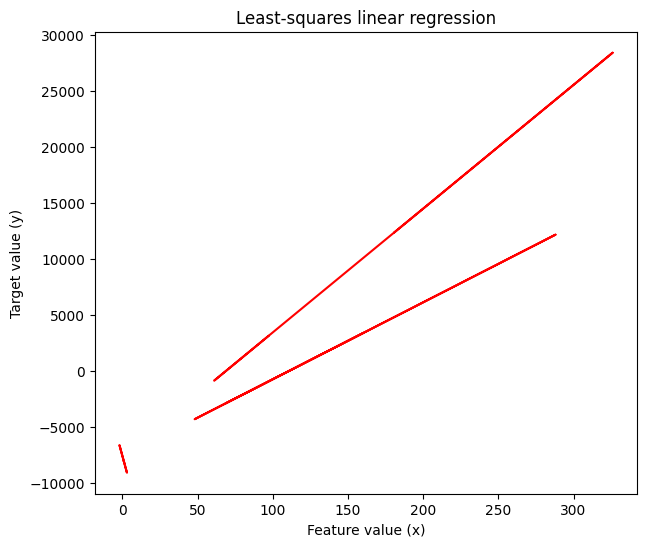

In [51]:
plt.figure(figsize=(7,6))
# plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X_train, reg.coef_ * X_train + reg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()
